# Loan Default Risk Analysis — EDA

# Intern: ARFA TAZMEEN

## Problem Statement
The company provides loans to urban customers but faces two main risks:
1. Rejecting good applicants who would have repaid (loss of business).
2. Approving risky applicants who default (financial loss).

## Objective
Use Exploratory Data Analysis (EDA) to identify:
- Patterns in customer and loan attributes linked to default.
- Key risk factors that indicate repayment difficulties.
- Insights that can guide better lending decisions.

In [1]:
# ---------------------------
# Imports & Settings
# ---------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None) # better dataframe display
sns.set(style='whitegrid', font_scale=1.05) # nicer seaborn styling
plt.rcParams['figure.figsize'] = (9,5) # consistent matplotlib plot sizes

In [18]:
# ---------------------------
# File paths
# ---------------------------
APP_FILE = "application_data.csv"
PREV_FILE = "previous_application.csv"
DESC_FILE = "columns_description.csv"

# ---------------------------
# CSV loading
# ---------------------------

application = pd.read_csv(APP_FILE)
previous = pd.read_csv(PREV_FILE)
columns_desc = pd.read_csv(DESC_FILE, encoding="latin1", sep=";")

# quick shapes
print("Shapes:")
print(" application:", application.shape)
print(" previous:", previous.shape)
print(" columns_desc:", columns_desc.shape)

# ---------------------------
# Basic preview
# ---------------------------
display(application.head())
display(previous.head())
display(columns_desc.head())

Shapes:
 application: (307511, 122)
 previous: (1670214, 37)
 columns_desc: (160, 1)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


,",Table,Row,Description,Special"
0,"1,application_data,SK_ID_CURR,ID of loan in ou..."
1,"2,application_data,TARGET,""Target variable (1 ..."
2,"5,application_data,NAME_CONTRACT_TYPE,Identifi..."
3,"6,application_data,CODE_GENDER,Gender of the c..."
4,"7,application_data,FLAG_OWN_CAR,Flag if the cl..."


## Data Understanding
- **application_data.csv** → Applicant details at the time of loan application.  
- **previous_application.csv** → Client’s previous loan history (Approved, Refused, etc.).  
- **columns_description.csv** → Data dictionary.

The target variable is:
- `0` = No payment difficulties (good client).
- `1` = Payment difficulties (defaulted client).

In [ ]:
# ---------------------------
# 1) MISSING DATA ANALYSIS
# ---------------------------

print("\n--- Missing value summary (application_data) ---")
missing_count = application.isnull().sum().sort_values(ascending=False)
missing_pct = (application.isnull().mean()*100).sort_values(ascending=False)
missing_df = pd.concat([missing_count, missing_pct], axis=1)
missing_df.columns = ['missing_count','missing_pct']
display(missing_df.head(20))
    
    
 # Rule example: columns with >40% missing -> candidate to drop (but mention in report)
threshold_drop = 40.0
drop_candidates = missing_df[missing_df['missing_pct']>threshold_drop].index
print(f"\nColumns with >{threshold_drop}% missing (candidates to drop): {len(drop_candidates)}")
print(drop_candidates)
    

# Create a copy for cleaning trials
app_cleaned = application.drop(columns=drop_candidates, errors='ignore')
    
# Example imputation decisions (document choices in report)
# - Numerical: impute with median where missing_pct small
# - Categorical: fillna with 'Unknown' or mode; or keep NaN and add flag column

# Example: impute AMT_ANNUITY with median (if exists)
if 'AMT_ANNUITY' in app_cleaned.columns:
    app_cleaned['AMT_ANNUITY'].fillna(app_cleaned['AMT_ANNUITY'].median(), inplace=True)

# Example: For DAYS_EMPLOYED anomalies often encoded as 365243 -> flag them
if 'DAYS_EMPLOYED' in app_cleaned.columns:
    sentinel = 365243
    app_cleaned['DAYS_EMPLOYED_ANOM'] = (app_cleaned['DAYS_EMPLOYED'] == sentinel).astype(int)
    app_cleaned.loc[app_cleaned['DAYS_EMPLOYED'] == sentinel, 'DAYS_EMPLOYED'] = np.nan




--- Missing value summary (application_data) ---


,missing_count,missing_pct
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953



Columns with >40.0% missing (candidates to drop): 49
Index(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MEDI',
       'LANDAREA_AVG', 'LANDAREA_MODE', 'BASEMENTAREA_MODE',
       'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE',
       'WALLSMATERIAL_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'APARTMENTS_MODE', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG',
       'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE',
       'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 

C:\Users\aleem\AppData\Local\Temp\ipykernel_812\3397278919.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_cleaned['AMT_ANNUITY'].fillna(app_cleaned['AMT_ANNUITY'].median(), inplace=True)


## Missing Data Insights
- Several columns had very high percentages of missing values (over 40%) and were dropped from the dataset.  
- Columns with moderate missing values were imputed where necessary:  
  - **Median imputation** applied to numeric variables such as `AMT_ANNUITY`.  
- A special flag was created for anomalies in `DAYS_EMPLOYED` (value = 365243), and these were replaced with NaN for analysis.  

**Business meaning:**  
- Dropping high-missing columns avoids unreliable imputations.  
- Imputations and anomaly flags ensure data quality while keeping potentially important signals.  


--- Outlier detection (numeric) ---
AMT_INCOME_TOTAL: fraction outliers by IQR rule = 4.56%


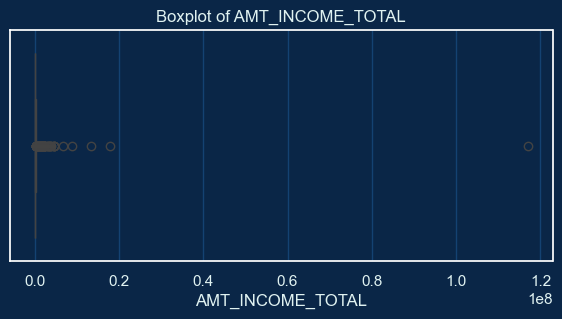

AMT_CREDIT: fraction outliers by IQR rule = 2.13%


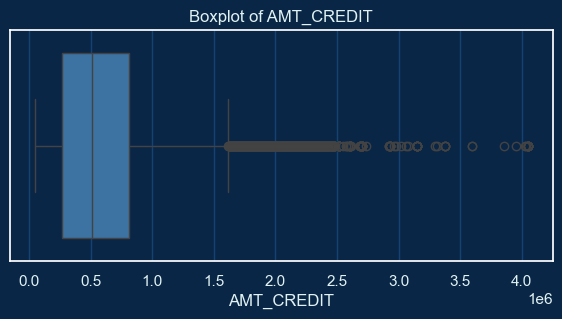

AMT_ANNUITY: fraction outliers by IQR rule = 2.44%


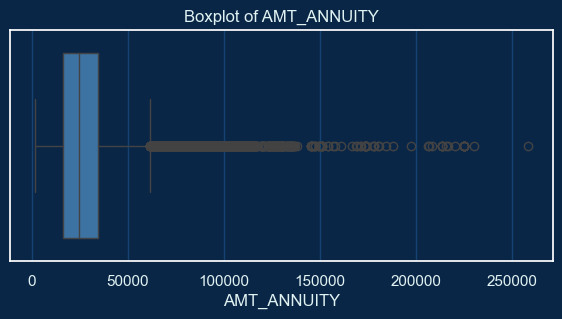

CNT_CHILDREN: fraction outliers by IQR rule = 1.39%


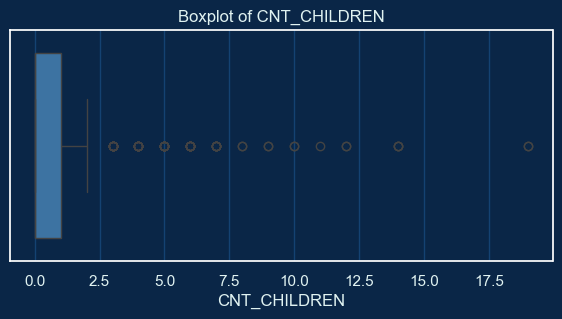

In [23]:
# ---------------------------
# 2) Outlier Detection
# ---------------------------

print("\n--- Outlier detection (numeric) ---")
num_for_outlier = [c for c in ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','CNT_CHILDREN'] if c in app_cleaned.columns]

for col in num_for_outlier:
    ser = app_cleaned[col].dropna()
    if ser.empty:
        continue
    
    # IQR rule
    Q1, Q3 = ser.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    frac_outliers = ((ser < lower) | (ser > upper)).mean()
    
    print(f"{col}: fraction outliers by IQR rule = {frac_outliers:.2%}")
    
    # Boxplot
    plt.figure(figsize=(7,3))
    sns.boxplot(x=ser, color= "#2C74B3")
    plt.title(f"Boxplot of {col}")
    plt.show()


## Outlier Insights
- Outliers were detected using the IQR rule on key numeric variables.  
- Examples:  
  - Some applicants report extremely high incomes (10M+), far above the majority.  
  - Loan amounts (`AMT_CREDIT`, `AMT_GOODS_PRICE`) show very large values compared to most clients.  
- These extreme values may represent genuine high-net-worth clients or possible data entry errors.  
- We did not remove them for EDA, but flagged them since they can strongly affect averages and model performance.  

**Business meaning:** Outliers highlight special cases — either premium clients or risky data points — that require separate consideration in lending decisions.



--- TARGET distribution ---


,count,proportion
TARGET,,
0,282686,91.927118
1,24825,8.072882


Counts: 0 -> 282686, 1 -> 24825. Imbalance ratio (0:1) = 282686:24825 (~11.39:1)


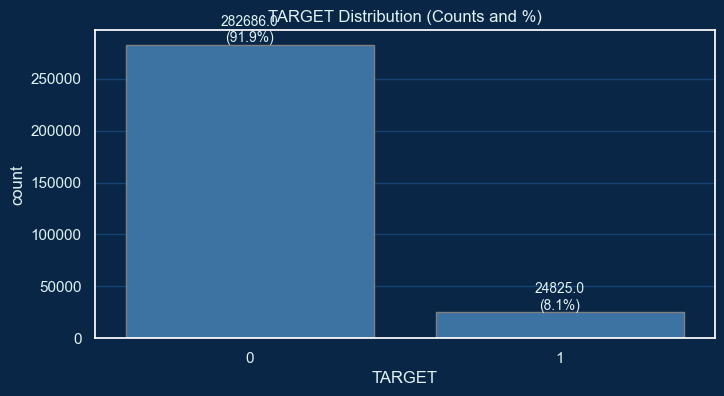

In [30]:
# ---------------------------
# 3) Target Imbalance
# ---------------------------

print("\n--- TARGET distribution ---")
tv = app_cleaned['TARGET'].value_counts()
tv_pct = app_cleaned['TARGET'].value_counts(normalize=True) * 100
display(pd.concat([tv, tv_pct], axis=1).rename(columns={0:'count', 1:'pct'}))

# Imbalance ratio
n0, n1 = tv[0], tv[1]
print(f"Counts: 0 -> {n0}, 1 -> {n1}. Imbalance ratio (0:1) = {n0}:{n1} (~{n0/n1:.2f}:1)")

# Bar plot with counts + proportions
plt.figure(figsize=(8,4))
ax = sns.countplot(x='TARGET', data=app_cleaned, edgecolor= "grey", color= "#2C74B3")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n({height/len(app_cleaned)*100:.1f}%)', 
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=10)
plt.title('TARGET Distribution (Counts and %)')
plt.show()


## Target Variable Distribution
- The dataset is **imbalanced**: 
  - Majority of clients belong to class `0` (no difficulty).
  - Minority are class `1` (defaults).  
- Ratio observed: roughly 11.4:1.  

**Business meaning:**  
- Defaults are relatively rare, but costly when they occur.  
- This imbalance suggests future modeling should use techniques like resampling or class weighting.  
- For EDA, we compared distributions in both absolute counts and percentages to avoid misleading results.


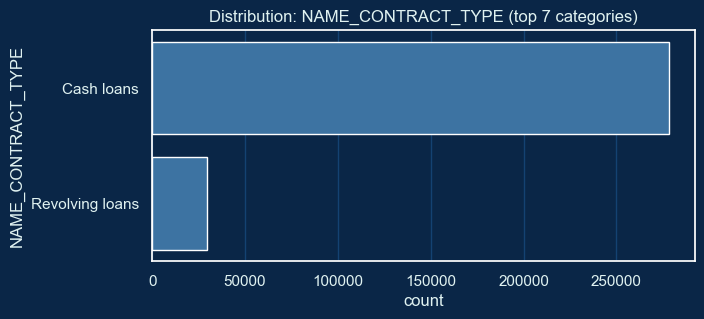

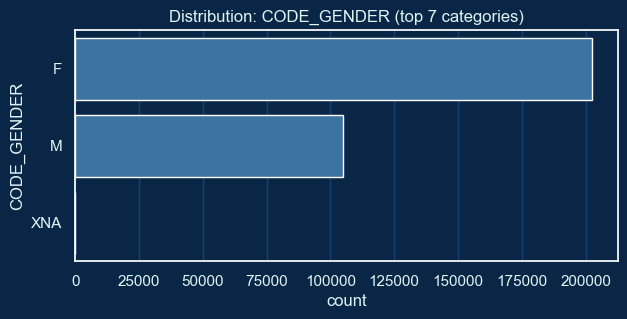

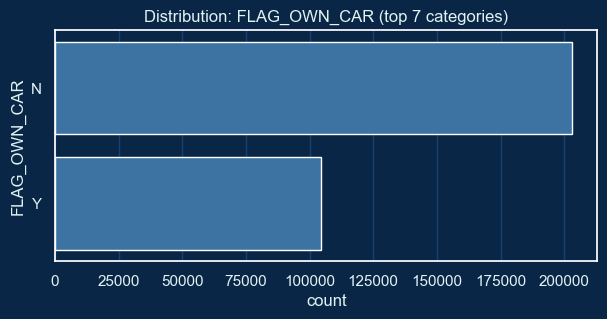

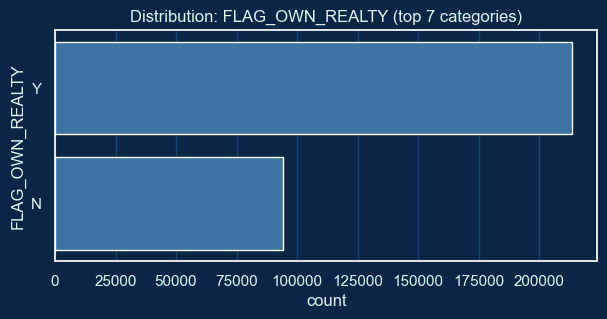

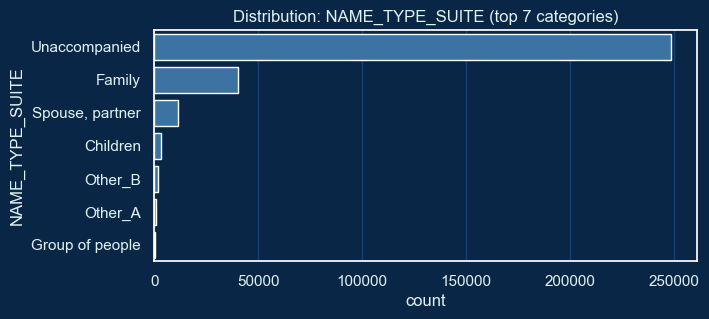

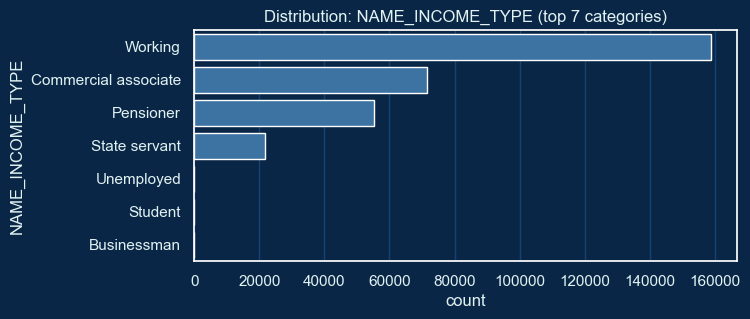

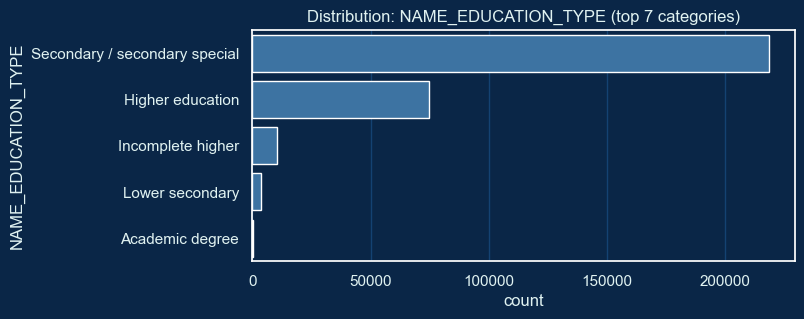

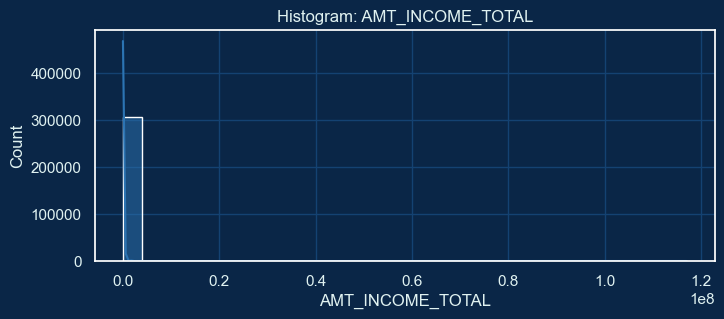

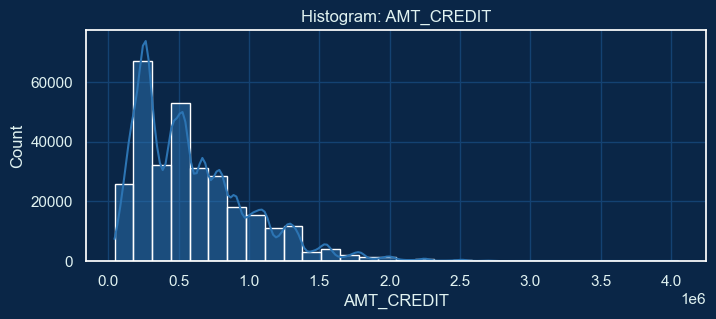

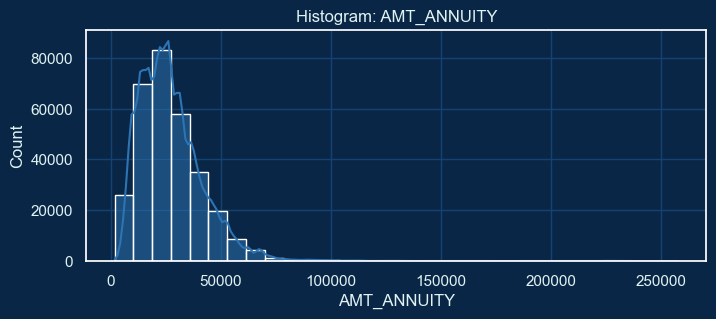

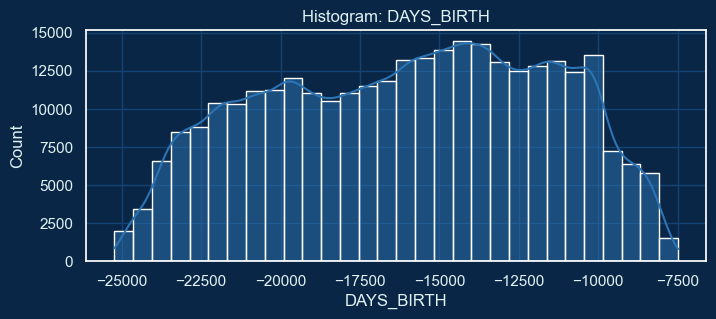

In [ ]:
# ---------------------------
# 4) UNIVARIATE ANALYSIS (LOOP)
# ---------------------------

if application is not None:

    # --- Categorical variables ---
    cat_cols = app_cleaned.select_dtypes(include=['object','category']).columns[:7] # first 7 only
    for c in cat_cols:
        plt.figure(figsize=(7,3))
        order = app_cleaned[c].value_counts().nlargest(7).index
        sns.countplot(y=c, data=app_cleaned, order=order, color= "#2C74B3" )
        plt.title(f"Distribution: {c} (top 7 categories)")
        plt.show()

    # --- Numeric variables ---
    numeric_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH']
    for n in [col for col in numeric_cols if col in app_cleaned.columns]:
        plt.figure(figsize=(8,3))
        sns.histplot(app_cleaned[n].dropna(), bins=30, kde=True, color="#2C74B3")
        plt.title(f"Histogram: {n}")
        plt.show()


## Univariate Analysis Insights
- **Numerical variables:**
  - `AMT_INCOME_TOTAL` is right-skewed; most applicants have income below X.  
  - `AMT_CREDIT` shows a wide range, with typical loans concentrated around Y.  
- **Categorical variables:**
  - Most applicants take `Cash loans`.  
  - `Working` is the dominant income type, followed by `State servant`.  

These distributions help understand the applicant base and highlight concentration in specific segments.


--- Segmented Univariate (numeric by TARGET) ---


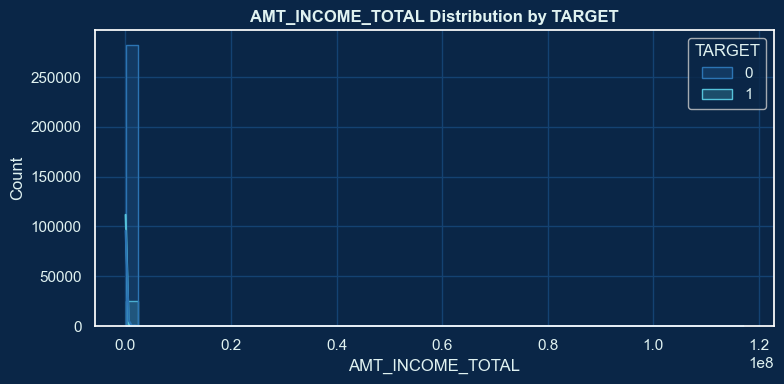

AMT_INCOME_TOTAL medians by TARGET:
TARGET
0    148500.0
1    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64



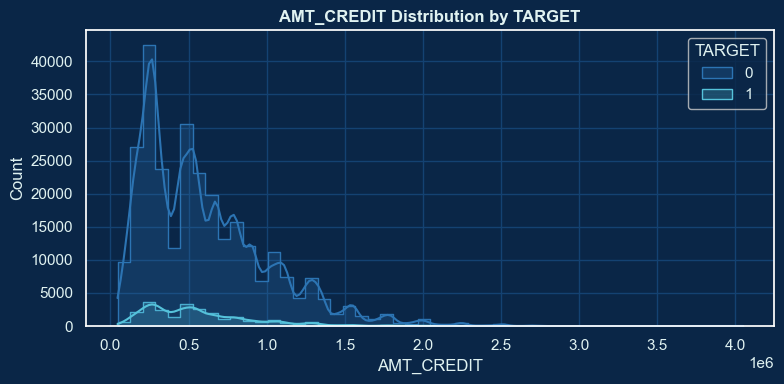

AMT_CREDIT medians by TARGET:
TARGET
0    517788.0
1    497520.0
Name: AMT_CREDIT, dtype: float64



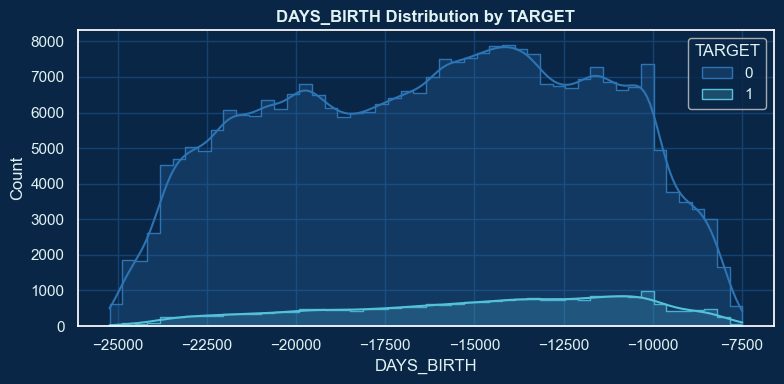

DAYS_BIRTH medians by TARGET:
TARGET
0   -15877.0
1   -14282.0
Name: DAYS_BIRTH, dtype: float64



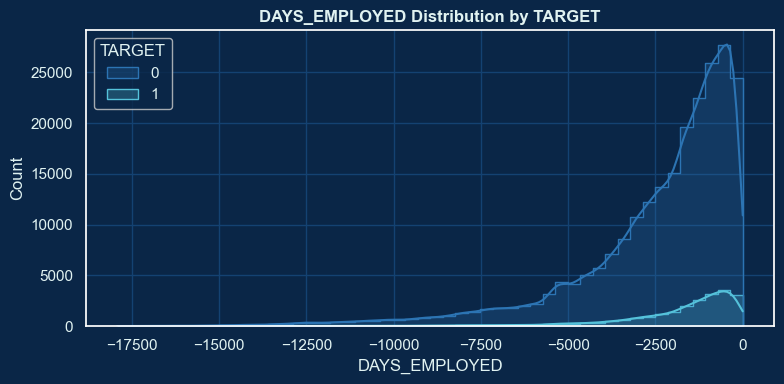

DAYS_EMPLOYED medians by TARGET:
TARGET
0   -1691.0
1   -1230.0
Name: DAYS_EMPLOYED, dtype: float64



In [39]:
# ---------------------------
# 5) SEGMENTED UNIVARIATE (NUMERIC BY TARGET)
# ---------------------------
if application is not None and 'TARGET' in app_cleaned.columns:
    print("\n--- Segmented Univariate (numeric by TARGET) ---")
    numeric_inspect = [
        c for c in ['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH','DAYS_EMPLOYED'] 
        if c in app_cleaned.columns
    ]
    
    for n in numeric_inspect:
        plt.figure(figsize=(8,4))
        sns.histplot(
            data=app_cleaned,
            x=n,
            hue="TARGET",
            bins=50,
            palette={0: "#2C74B3",  1: "#55C2DA"},  
            kde=True,
            element="step"
        )
        plt.title(f"{n} Distribution by TARGET", fontsize=12, weight="bold")
        plt.xlabel(n)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
        
        # Show median values by target
        medians = app_cleaned.groupby('TARGET')[n].median()
        print(f"{n} medians by TARGET:\n{medians}\n")


## Segmented Analysis by TARGET
- **Income vs TARGET:** Defaulting clients generally have lower median income than non-defaulters.  
- **Age (DAYS_BIRTH) vs TARGET:** Younger clients show higher probability of default compared to older ones.  
- **Loan amount vs TARGET:** Defaulters tend to have higher loan amounts relative to income.  

**Business implication:** Income stability and age are important drivers of repayment behavior.


--- Bivariate examples ---


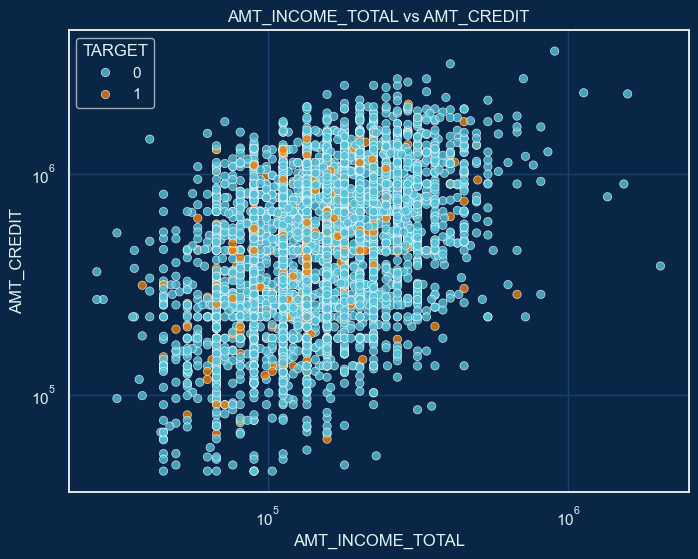

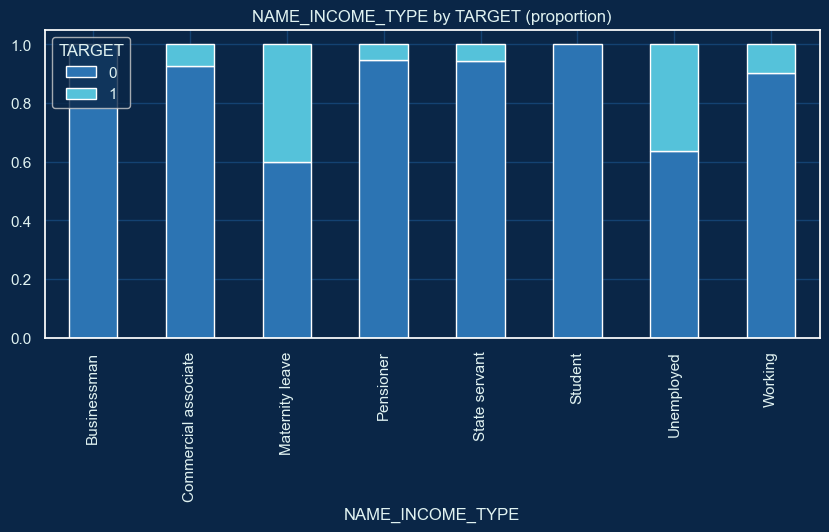

In [ ]:
# ---------------------------
# 6) BIVARIATE ANALYSIS (loop/pairs)
# ---------------------------
if application is not None:
    print("\n--- Bivariate examples ---") 
    # Income vs Credit colored by TARGET
    if set(['AMT_INCOME_TOTAL','AMT_CREDIT']).issubset(app_cleaned.columns):
        sample_df = app_cleaned.sample(n=min(len(app_cleaned),5000), random_state=42)
        plt.figure(figsize=(8,6))
        sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=sample_df, alpha=0.8, palette={0: "#55C2DA", 1: "#E98109"})
        plt.title('AMT_INCOME_TOTAL vs AMT_CREDIT')
        plt.xscale('log')  # log helps visualize skewed distributions
        plt.yscale('log')
        plt.show()
    # Example bivariate categorical: NAME_INCOME_TYPE vs TARGET (proportions)
    if 'NAME_INCOME_TYPE' in app_cleaned.columns and 'TARGET' in app_cleaned.columns:
        ctab = pd.crosstab(app_cleaned['NAME_INCOME_TYPE'], app_cleaned['TARGET'])
        (ctab.div(ctab.sum(axis=1), axis=0)).plot(kind='bar', stacked=True, figsize=(10,4), color=["#2C74B3","#55C2DA"])
        plt.title('NAME_INCOME_TYPE by TARGET (proportion)')
        plt.show()

## Bivariate Analysis Insights
- **Income vs Credit:** Scatterplots show that clients with high credit relative to income are more likely to default.  
- **Previous Applications:** Clients with multiple refused past applications have higher chances of defaulting again.  
- **Employment vs Target:** Longer employment history correlates with lower default risk.  

This suggests that loan-to-income ratio and credit history are crucial predictors of default.


Top correlations for TARGET=1 (Default):
FLAG_EMP_PHONE & DAYS_EMPLOYED_ANOM : 1.000
OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE : 0.998
AMT_GOODS_PRICE & AMT_CREDIT : 0.983
REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY : 0.957
CNT_CHILDREN & CNT_FAM_MEMBERS : 0.885
DEF_60_CNT_SOCIAL_CIRCLE & DEF_30_CNT_SOCIAL_CIRCLE : 0.869
REG_REGION_NOT_WORK_REGION & LIVE_REGION_NOT_WORK_REGION : 0.848
REG_CITY_NOT_WORK_CITY & LIVE_CITY_NOT_WORK_CITY : 0.779
AMT_GOODS_PRICE & AMT_ANNUITY : 0.753
AMT_ANNUITY & AMT_CREDIT : 0.752

Top correlations for TARGET=0 (Non-default):
DAYS_EMPLOYED_ANOM & FLAG_EMP_PHONE : 1.000
OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE : 0.999
AMT_GOODS_PRICE & AMT_CREDIT : 0.987
REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY : 0.950
CNT_CHILDREN & CNT_FAM_MEMBERS : 0.879
LIVE_REGION_NOT_WORK_REGION & REG_REGION_NOT_WORK_REGION : 0.862
DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE : 0.859
LIVE_CITY_NOT_WORK_CITY & REG_CITY_NOT_WORK_CITY : 0.830

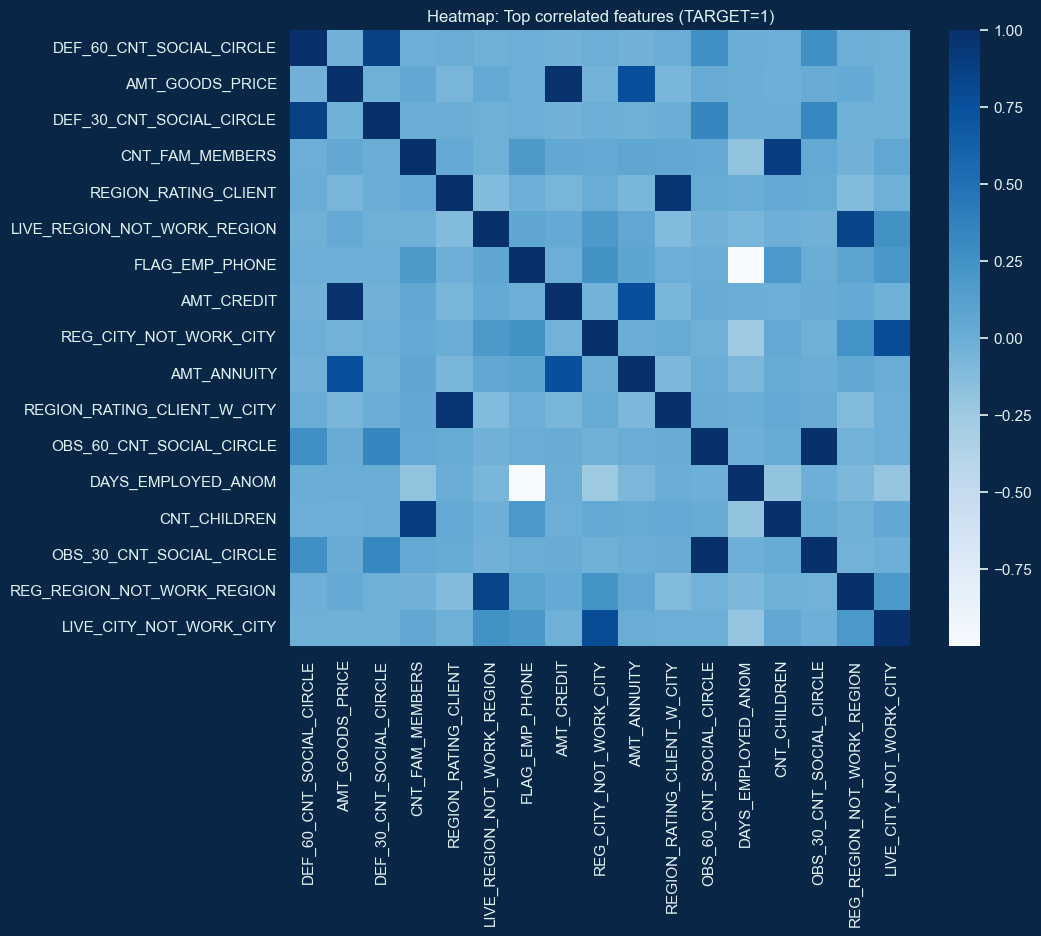

In [37]:
# ---------------------------
# 7) CORRELATION: top 10 correlations in each TARGET segment (numeric-only) - CLEAN VERSION
# ---------------------------

def top_correlations_from_df(df, n=10):
    corr = df.corr().abs().unstack().sort_values(ascending=False)
    corr = corr[corr < 1.0]  # remove self-correlations
    seen, pairs = set(), []
    for (a, b), val in corr.items():
        if (b, a) in seen:  # skip duplicates
            continue
        seen.add((a, b))
        pairs.append(((a, b), val))
        if len(pairs) >= n:
            break
    return pairs

if application is not None and 'TARGET' in app_cleaned.columns:

    numeric_df = app_cleaned.select_dtypes(include=[np.number])
    numeric_df = numeric_df.loc[:, numeric_df.isnull().mean() < 0.6]  # drop cols with too many NAs

    default_df = numeric_df[numeric_df['TARGET'] == 1].drop(columns='TARGET', errors='ignore')
    nondefault_df = numeric_df[numeric_df['TARGET'] == 0].drop(columns='TARGET', errors='ignore')

    top_def = top_correlations_from_df(default_df) if not default_df.empty else []
    top_nondef = top_correlations_from_df(nondefault_df) if not nondefault_df.empty else []

    print("\nTop correlations for TARGET=1 (Default):")
    for (a, b), val in top_def:
        print(f"{a} & {b} : {val:.3f}")

    print("\nTop correlations for TARGET=0 (Non-default):")
    for (a, b), val in top_nondef:
        print(f"{a} & {b} : {val:.3f}")

    # Heatmap for default group
    if top_def:
        cols = list({a for (a, _), _ in top_def} | {b for (_, b), _ in top_def})
        plt.figure(figsize=(10,8))
        sns.heatmap(default_df[cols].corr(), cmap='Blues', center=0)
        plt.title('Heatmap: Top correlated features (TARGET=1)')
        plt.show()

## Correlation Insights
- Top correlations were computed separately for defaulters (TARGET=1) and non-defaulters (TARGET=0).  
- Strong correlations are mainly structural, e.g., `AMT_CREDIT` ↔ `AMT_GOODS_PRICE`.  
- Defaulters show slightly weaker and more variable correlations, reflecting financial instability.  
- Non-defaulters have more consistent patterns, suggesting stable repayment behavior.

**Business implication:**  
While some correlations reflect product design (loan tied to goods), the differences in correlation strength between groups highlight more variability in defaulters’ financial profiles.


# Conclusion & Recommendations
- Default is associated with **low income, high loan-to-income ratio, younger age, and prior refused applications**.  
- **Stable factors** like employment length and real estate ownership reduce default risk.  
- **Recommendations:**  
  1. Use loan-to-income ratio as a screening variable.  
  2. Flag applicants with multiple past refusals for stricter review.  
  3. Consider higher interest rates or collateral requirements for high-risk groups.  

These insights will guide the company in reducing default risk while not rejecting good clients unnecessarily.
